In [45]:
import random
import equadratures as eq
import numpy as np
import matplotlib.pyplot as plt
from ModelTree import ModelTree
from sklearn.metrics import mean_squared_error
import scipy.stats as st

In [77]:
def f(x):
    
    noise = 0.05 * st.norm.rvs(0, 1)

    if x < 0.5:
        return x**3 - x + 0.5 + noise
    elif x > 0.5:
        return x + noise
    
def sample(N):
    X, y = [], []
    for i in range(N):
        x = random.random()
        X.append(np.array(x))
        y.append(np.array(f(x)))
    return np.array(X), np.array(y)

In [74]:
def plot(models, X_train, y_train):
    
    x_test = np.reshape(np.linspace(0, 1, 100), (100, 1))
    X_train = np.reshape(X_train, (X_train.shape[0], 1))
    y_train = np.reshape(y_train, (y_train.shape[0], 1))

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for i in range(0, X.shape[0]):
      plt.scatter(X_train[i,0], y_train[i,0], marker='o', s=80, color='blue')
    
    colours = ['green', 'red']
    i = 0
    for model in models:
        model.fit(X_train,y_train)
        
        plt.plot(x_test, model.predict(x_test), 'k-', label=str(model.__class__.__name__), color = colours[i])
        plt.xlabel('$X$', fontsize=13)
        plt.ylabel('$Y$', fontsize=13)
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        i += 1
    plt.legend()

In [69]:
class Poly:
    def __init__(self, order):
        self.name = 'Polynomial regression'
        self.order = order
        self.poly = False
        
    def fit(self, X, y):

        param = eq.Parameter(distribution='Uniform', lower=0, upper=1., order=self.order)
        myParameters = [param for i in range(1)] # one-line for loop for parameters
        
        myBasis = eq.Basis('Univariate')
        self.poly = eq.Poly(myParameters, myBasis, method='least-squares', sampling_args={'sample-points':X, 'sample-outputs':y} )
        self.poly.set_model()
        
    def predict(self, X):
        return self.poly.get_polyfit(np.array(X))

In [70]:
class PolyTree:
    def __init__(self):
        self.poly = Poly(3)
    def fit(self,X,y):
        self.poly.fit(X,y)
    def predict(self, X):
        return self.poly.predict(X)
    def loss(self, X, y, y_pred):
        return mean_squared_error(y, y_pred)

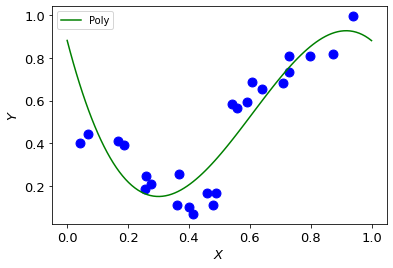

In [82]:
X, y = sample(25)
X = np.reshape(X, (X.shape[0], 1))
y = np.reshape(y, (y.shape[0], 1))
    
poly = Poly(3)
plot([poly], X, y)

In [83]:
model = PolyTree()
model_tree = ModelTree(model, max_depth=2, min_samples_leaf=10,
                           search_type="greedy", n_search_grid=100)
model_tree.fit(X, y, verbose=True)

 max_depth=2, min_samples_leaf=10, search_type=greedy...
 node 0 @ depth 0: loss=0.014287, j_feature=0, threshold=0.487682, N=(14,11)
  *leaf 1 @ depth 1: loss=0.002248, N=14
  *leaf 2 @ depth 1: loss=0.001296, N=11


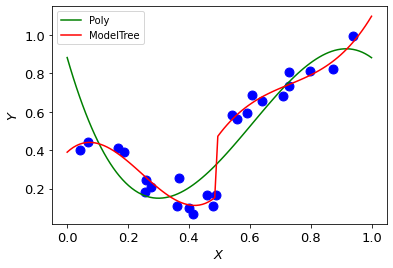

In [84]:
plot([poly, model_tree], X, y)

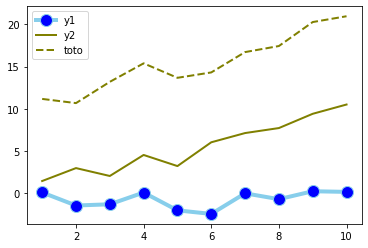

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21) })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()

In [60]:
model_tree.explain()

TypeError: explain() missing 2 required positional arguments: 'X' and 'header'